# Decision trees - Binary Classification

# 0. Setup

In this notebook, we'll explore Decision Trees for classification using the Palmer Penguins dataset.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Exploration

Let's start by loading our dataset and exploring its characteristics.

## The Data

We are going to use the 'Palmer Penguins' dataset because penguins are funny creatures. More info can be found at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

<img src="images/penguin.jpg" style="max-width:400px">


Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [17]:
df = pd.read_csv("datasets/penguins_size.csv")
df.info

<bound method DataFrame.info of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     bo

In [16]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


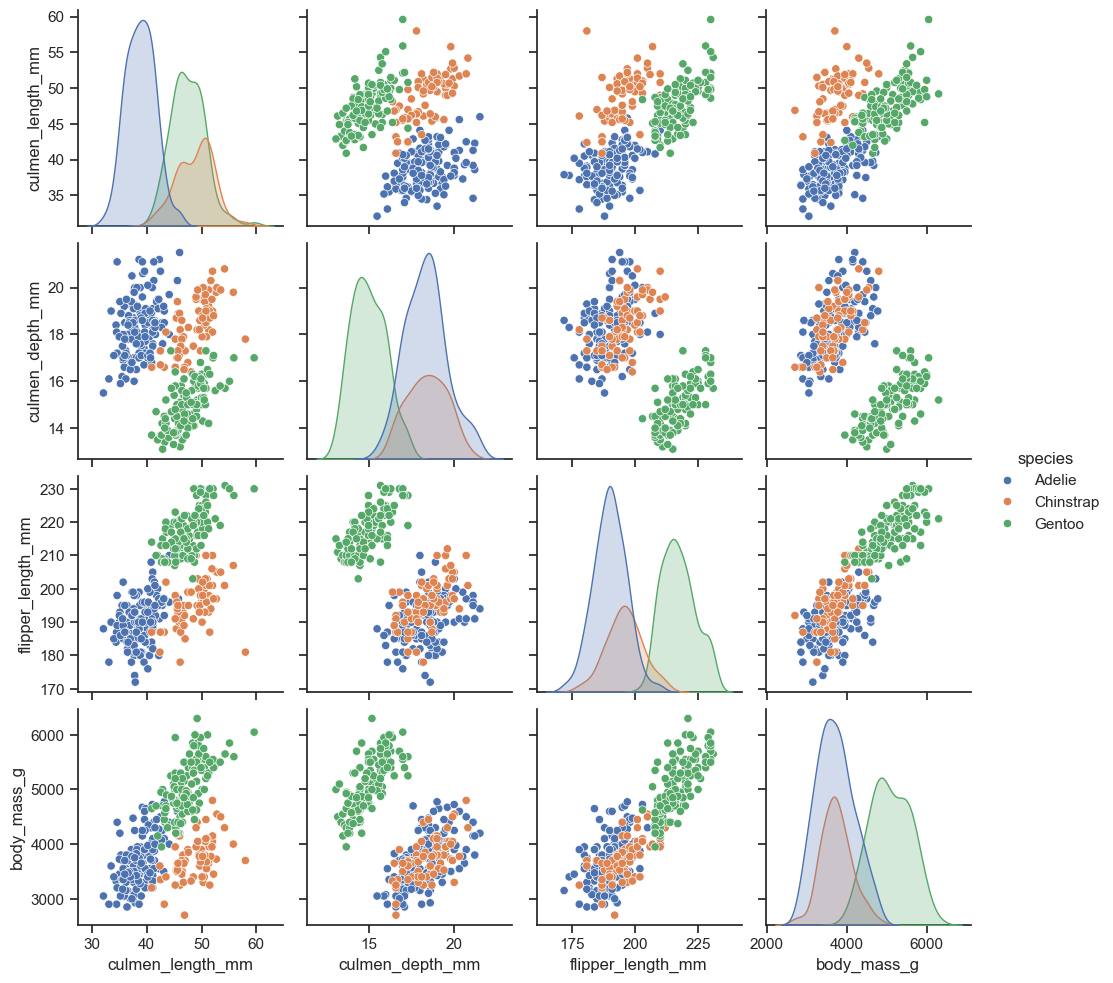

In [4]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="species")

In [5]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

# 2. Data Processing

Now that we've explored our data, let's prepare it for model training.

In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [7]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


## Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 3. Model Building

Let's build and train our Decision Tree model.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
preds = Dtree.predict(X_test)

# 4. Evaluation

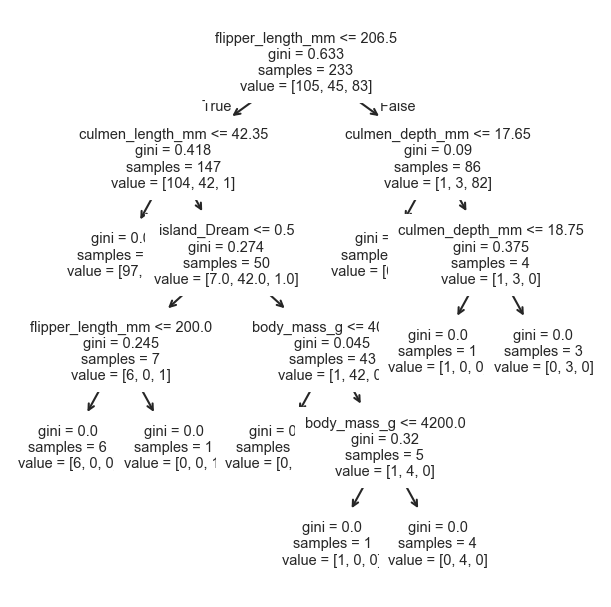

In [13]:
from sklearn import tree
plt.figure(figsize = (5,5), dpi = 150)
tree.plot_tree(Dtree, fontsize = 7, 
               feature_names = ['culmen_length_mm', 'culmen_depth_mm', 
                                'flipper_length_mm','body_mass_g', 
                                'island_Dream', 'island_Torgersen', 
                                'sex_FEMALE','sex_MALE']);

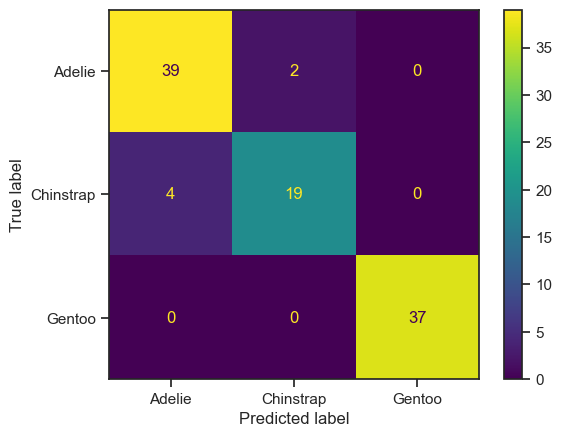

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test,preds)
CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=Dtree.classes_)
CM_plot.plot()

In [15]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy Score: 0.9405940594059405

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



### Understanding the Metrics

The classification report above shows several key metrics for each penguin species:

1. **Precision**: 
   - Measures how many of our predicted species were actually correct
   - Formula: True Positives / (True Positives + False Positives)
   - High precision means when we predict a penguin is of a certain species, we're usually right
   - Example: If precision for Adelie is 0.90, when we predict a penguin is Adelie, we're right 90% of the time

2. **Recall**: 
   - Measures how many of the actual species we correctly identified
   - Formula: True Positives / (True Positives + False Negatives)
   - High recall means we successfully identify most penguins of a particular species
   - Example: If recall for Gentoo is 0.95, we correctly identify 95% of all actual Gentoo penguins

3. **F1-Score**:
   - The harmonic mean of precision and recall
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Balances both precision and recall
   - A high F1-score indicates good balance between precision and recall

4. **Support**:
   - The number of samples for each species in the test set
   - Helps understand if our dataset is balanced across species